#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT VALUE OF "TRANPORTED" FEATURE OF SPACESHIP TITANIC KAGGLE CASE

In [505]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier

#### LOADING TRAIN AND TEST DATA

In [506]:
data_train = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Spaceship Titanic/train.csv")
data_test = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Spaceship Titanic/test.csv")

#### CREATING AND PRINTING DATASET AS A LIST

In [507]:
dataset = [data_train, data_test]

dataset

[     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...       ...       ...            ...   ...    ...   
 8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCourt  Shoppin

#### DATASET DUPLICATES CHECKING

In [508]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### PRINTING INFORMATION OF DATA TRAIN - WE WANT TO KNOW HOW MANY CELLS OF DATA TRAIN ARE NOT-NULL AND WHAT TYPE OF DATA IS DEFINED FOR DIFFERENT FEATURES (COLUMNS)

In [509]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### PRINTING SUM OF NULL DATA FOR DATASET

In [510]:
for data in dataset:
    print(data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


#### PRINTING UNIQUE VALUES OF DATA FOR DATASET

In [511]:
for data in dataset:
    print(data.nunique())

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64
PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64


#### PRINTING FIRST 5 OBSERVATIONS FOR DATA_TRAIN

In [512]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### SPLITTING PASSENGER ID FEATURE AND CREATING GROUP, GROUPSIZE AND SOLO FEATURES

In [513]:
for data in dataset:
    data['Group'] = data['PassengerId'].apply(lambda x: x.split('_')[0])
    data['GroupSize'] = data['Group'].map(lambda x: data['Group'].value_counts()[x])
    data['Solo'] = data['GroupSize'] == 1

#### PLOTTING BAR CHART OF GROUP SIZE FEATURE IN RELATION TO TRANSPORTED FEATURE

Text(0.5, 1.0, 'GroupSize')

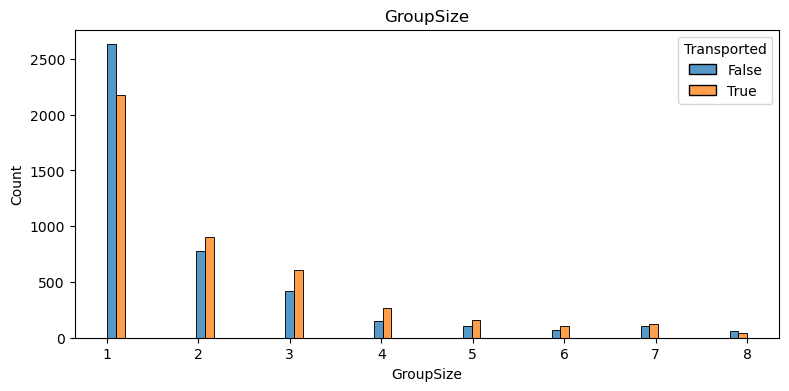

In [514]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='GroupSize',
             hue='Transported',
             multiple='dodge')
plt.title('GroupSize')

#### PLOTTING BAR CHART  OF SOLO FEATURE IN RELATION TO TRANSPORTED FEATURE

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 1.0, 'Solo')

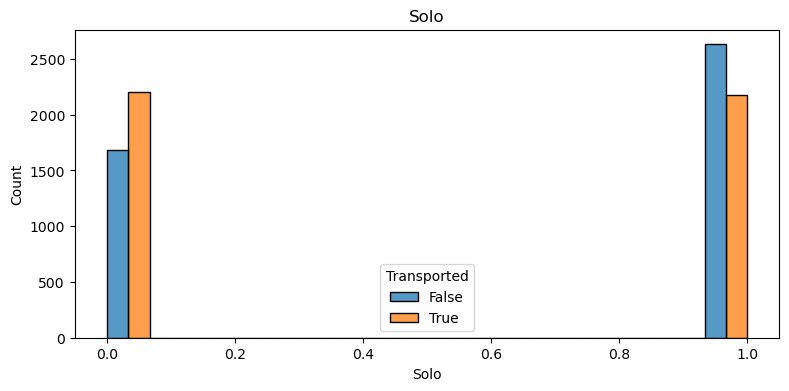

In [515]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Solo',
             hue='Transported',
             multiple='dodge')
plt.title('Solo')

#### SPLITTING CABIN FEATURE INTO CABIN_DECK, CABIN_NUM AND CABIN_SIDE FEATURES

In [516]:
data_train2 = data_train.dropna(subset = ['Cabin'])
data_test2 = data_test.dropna(subset = ['Cabin'])

Cabin_train = []
Cabin_test = []

Cabin_train.append(data_train2['Cabin'].astype(str).apply(lambda x: x.split('/')[0]).apply(pd.Series).stack().reset_index(drop=True))
Cabin_train.append(data_train2['Cabin'].astype(str).apply(lambda x: x.split('/')[1:-1]).apply(pd.Series).stack().reset_index(drop=True))
Cabin_train.append(data_train2['Cabin'].astype(str).apply(lambda x: x.split('/')[2:]).apply(pd.Series).stack().reset_index(drop=True))

Cabin_test.append(data_test2['Cabin'].astype(str).apply(lambda x: x.split('/')[0]).apply(pd.Series).stack().reset_index(drop=True))
Cabin_test.append(data_test2['Cabin'].astype(str).apply(lambda x: x.split('/')[1:-1]).apply(pd.Series).stack().reset_index(drop=True))
Cabin_test.append(data_test2['Cabin'].astype(str).apply(lambda x: x.split('/')[2:]).apply(pd.Series).stack().reset_index(drop=True))

cabin_train_transposed = pd.DataFrame(Cabin_train).transpose()
cabin_train_transposed.columns = ['CabinDeck', 'CabinNum', 'CabinSide']

cabin_test_transposed = pd.DataFrame(Cabin_test).transpose()
cabin_test_transposed.columns = ['CabinDeck', 'CabinNum', 'CabinSide']

data_train = pd.concat([data_train2.reset_index(drop= True), cabin_train_transposed], axis=1)
data_test = pd.concat([data_test2.reset_index(drop= True), cabin_test_transposed], axis=1)

dataset = [data_train, data_test]

#### PLOTTING BAR CHART OF CABIN_DECK CABIN_NUM AND CABIN_SIDE FEATURES IN RELATION TO TRANSPORTED FEATURE

Text(0.5, 1.0, 'CabinSide')

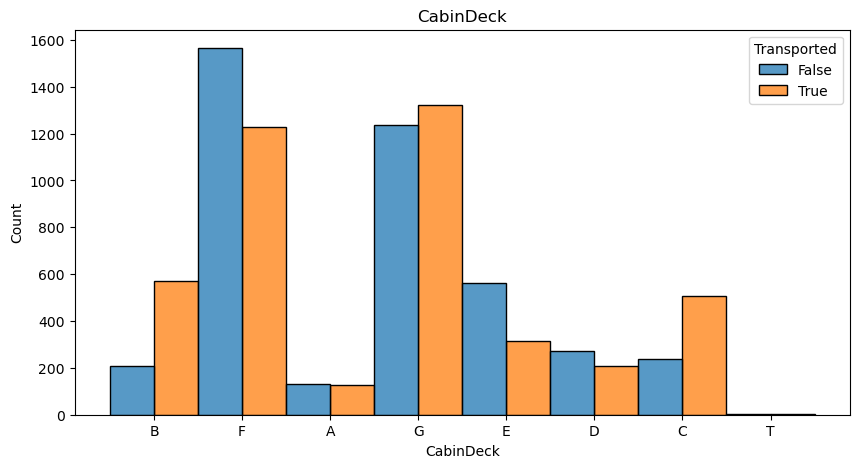

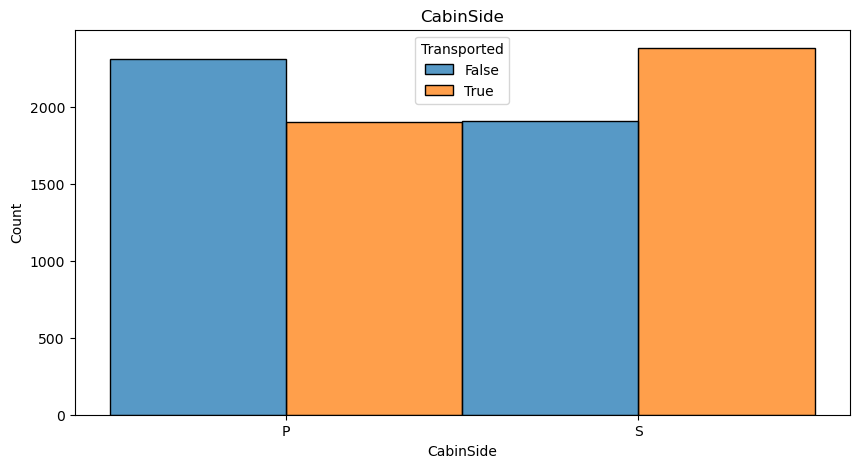

In [517]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_train, 
             x=data_train['CabinDeck'], 
             hue=data_train['Transported'], 
             multiple='dodge')
plt.title('CabinDeck')

#plt.figure(figsize=(10,5))
#sns.histplot(data=data_train, 
#             x=data_train['CabinNum'], 
#             hue=data_train['Transported'], 
#             multiple='dodge')
#plt.title('CabinNum')

plt.figure(figsize=(10,5))
sns.histplot(data=data_train, 
             x=data_train['CabinSide'], 
             hue=data_train['Transported'], 
             multiple='dodge')
plt.title('CabinSide')

#### PLOTTING BAR CHART FOR HOME_PLANET FEATURE IN RELATION TO TRANSPORTED FEATURE

Text(0.5, 1.0, 'HomePlanet')

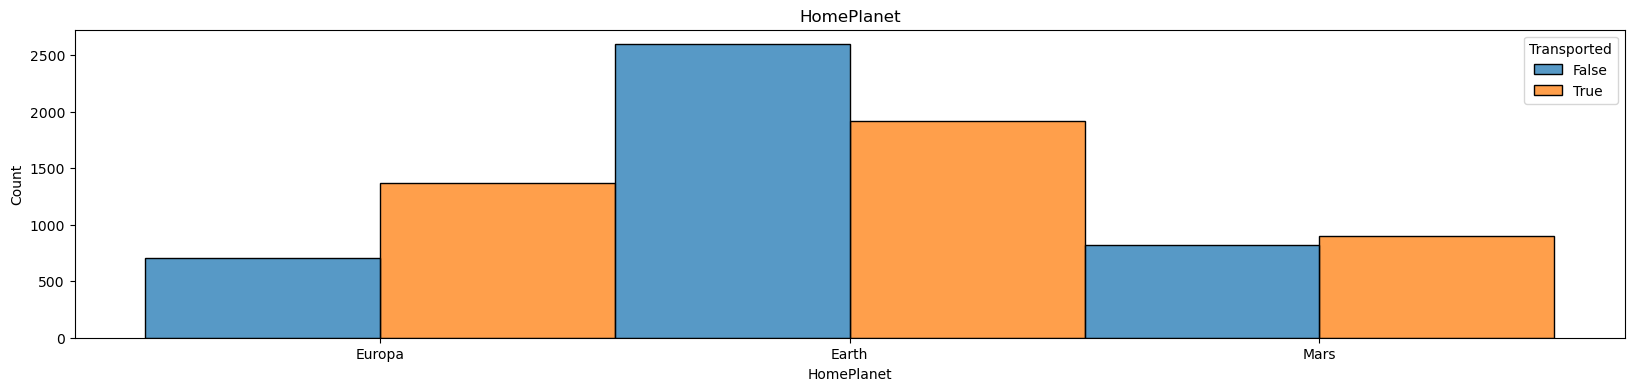

In [518]:
plt.figure(figsize=(20,4))
sns.histplot(data=data_train,
             x='HomePlanet',
             hue='Transported',
             multiple='dodge')
plt.title('HomePlanet')

#### PLOTTING BAR CHART FOR CRYO_SLEEP FEATURE IN RELATION TO TRANSPORTED FEATURE

Text(0.5, 1.0, 'CryoSleep')

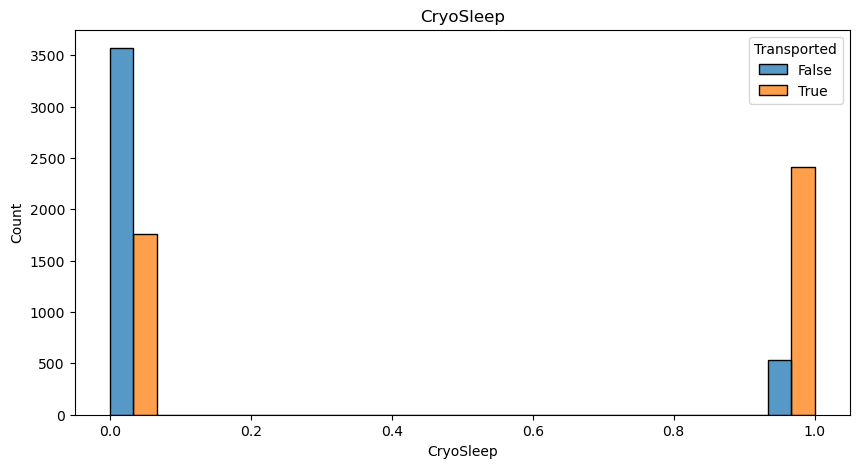

In [519]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_train,
             x=data_train['CryoSleep'].astype(float),
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('CryoSleep')

#### PLOTTING BAR CHART FOR DESTINATION FEATURE IN RELATION TO TRANSPORTED FEATURE

Text(0.5, 1.0, 'Destination')

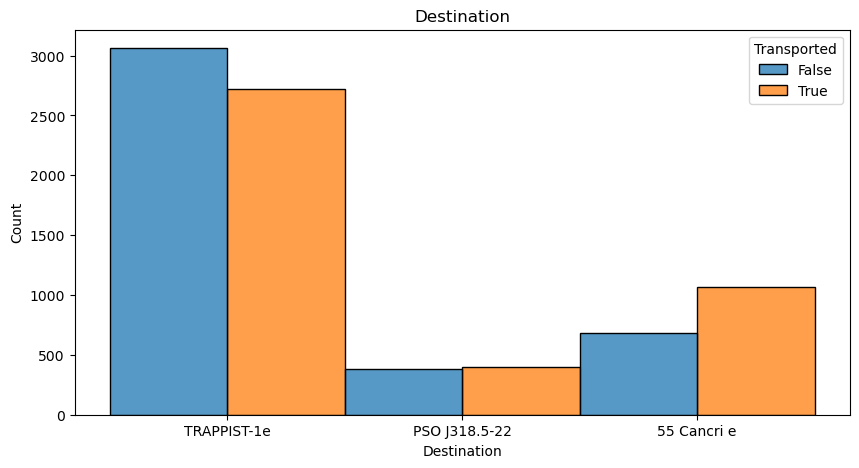

In [520]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_train, 
             x=data_train['Destination'], 
             hue=data_train['Transported'], 
             multiple='dodge')
plt.title('Destination')

#### PLOTTING BAR CHART FOR AGE FEATURE IN RELATION TO TRANSPORTED FEATURE AND BOX PLOT OF AGE FEATURE TO CHECK FOR OUTLIERS

Text(0.5, 1.0, 'Age distribution')

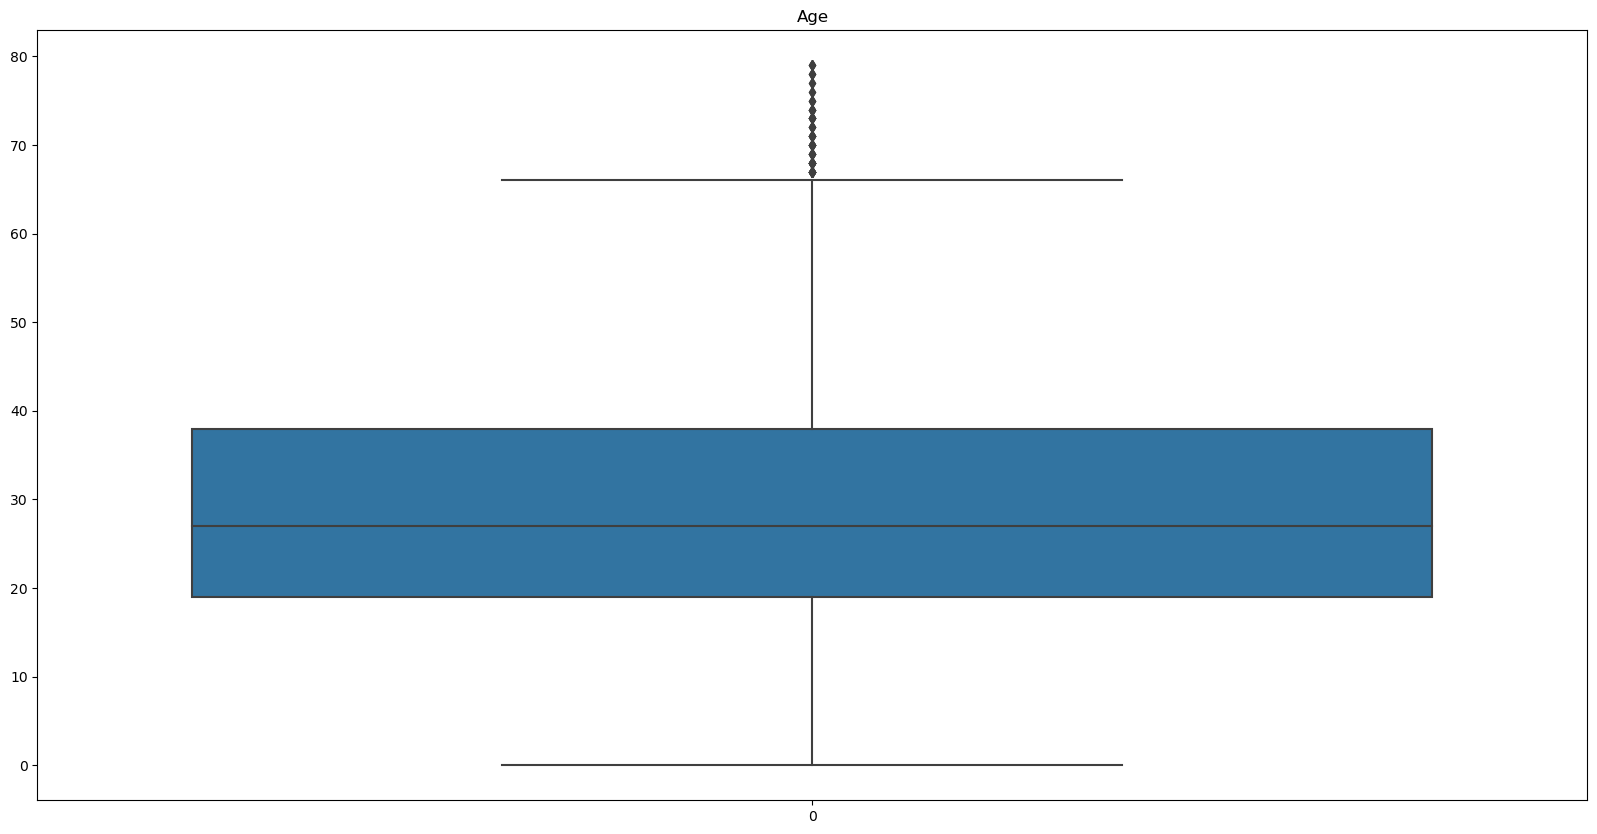

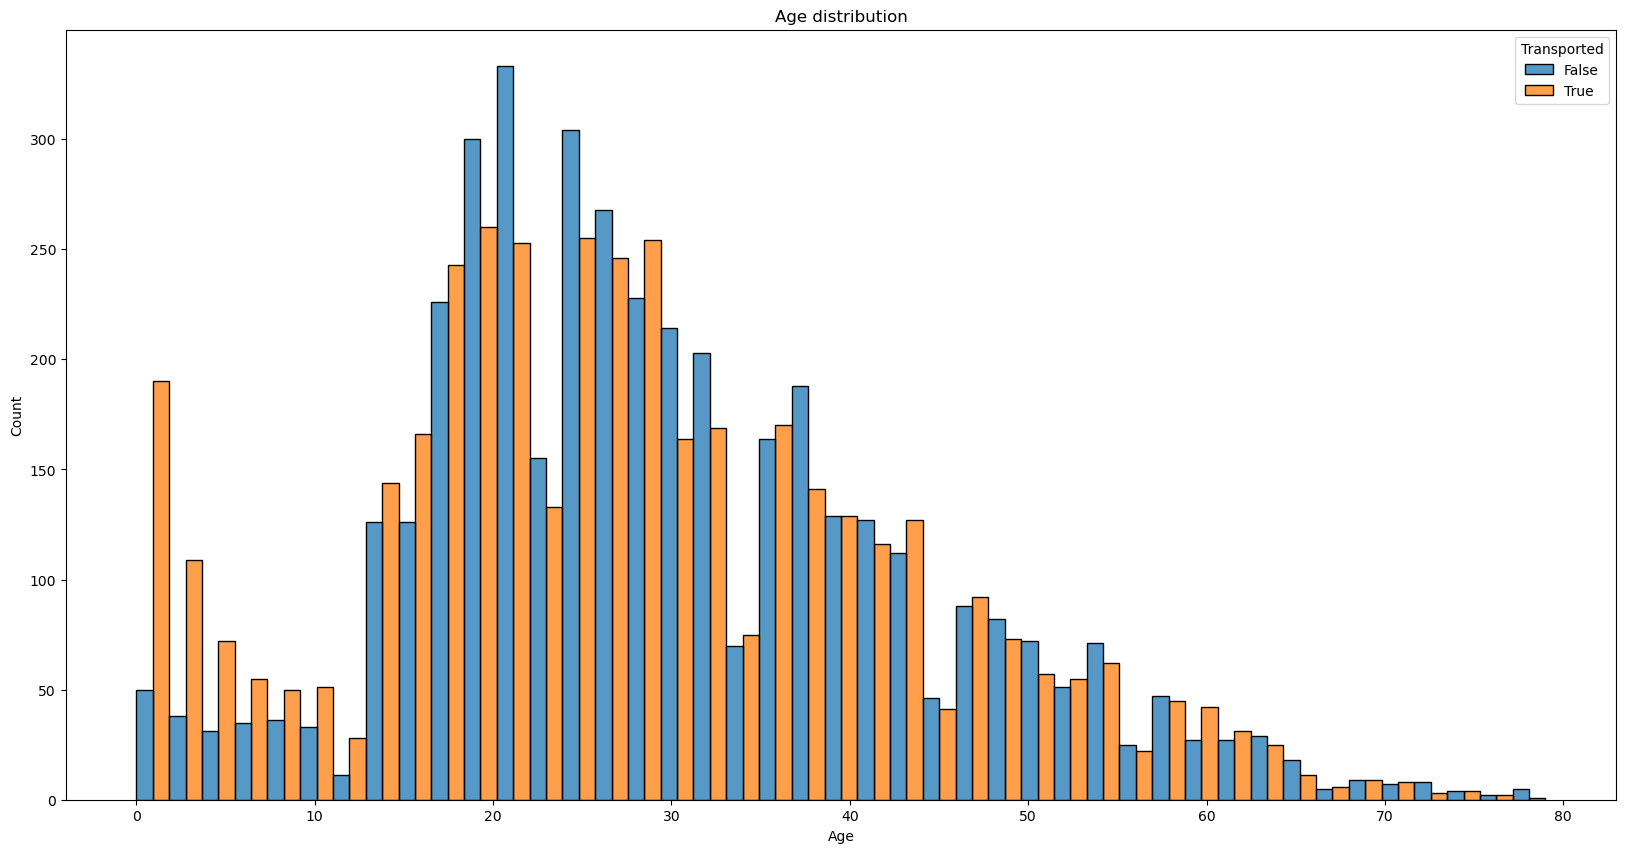

In [521]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train['Age'])
plt.title('Age')

plt.figure(figsize=(20,10))
sns.histplot(data=data_train['Age'],
             x=data_train['Age'],
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('Age distribution')

#### PLOTTING BAR CHART FOR VIP FEATURE IN RELATION TO TRANSPORTED FEATURE

Text(0.5, 1.0, 'VIP')

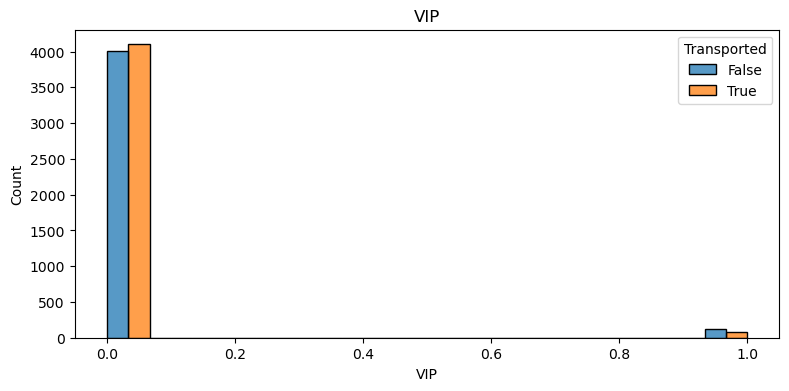

In [522]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train['VIP'],
             x=data_train['VIP'].astype(float),
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('VIP')

#### PLOTTING BAR CHART FOR ROOM_SERVICE FEATURE IN RELATION TO TRANSPORTED FEATURE AND BOX PLOT OF ROOM_SERVICE FEATURE TO CHECK FOR OUTLIERS

Text(0.5, 1.0, 'RoomService')

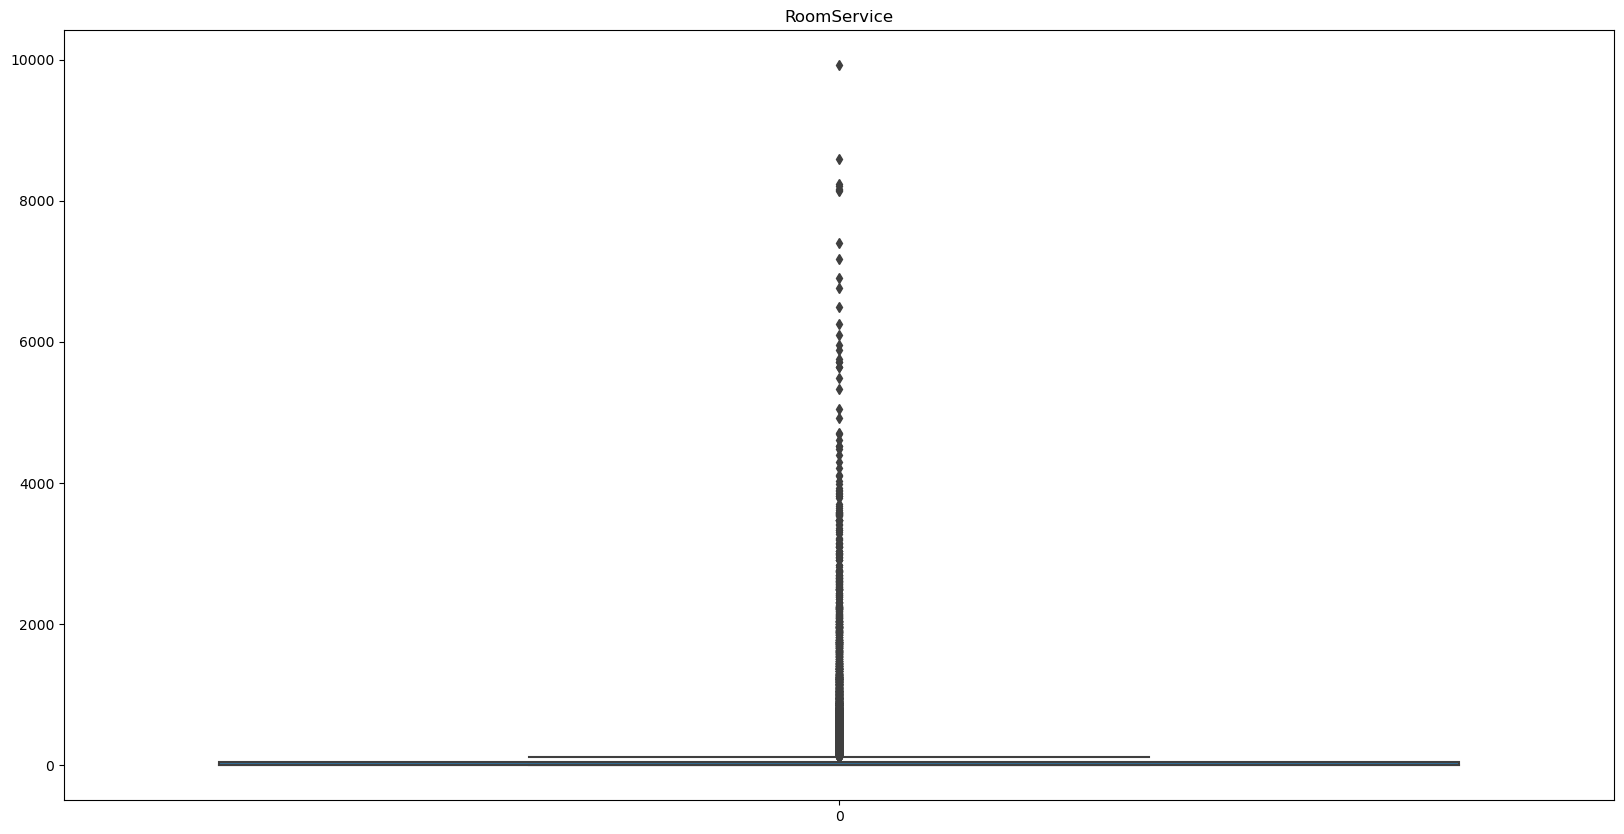

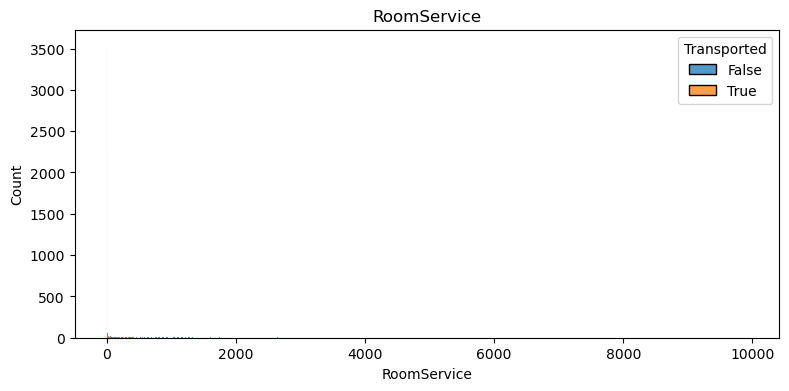

In [523]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train['RoomService'])
plt.title('RoomService')

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train['RoomService'],
             x=data_train['RoomService'],
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('RoomService')

#### PLOTTING BAR CHART FOR FOOD_COURT FEATURE IN RELATION TO TRANSPORTED FEATURE AND BOX PLOT OF FOOD_COURT FEATURE TO CHECK FOR OUTLIERS

Text(0.5, 1.0, 'FoodCourt')

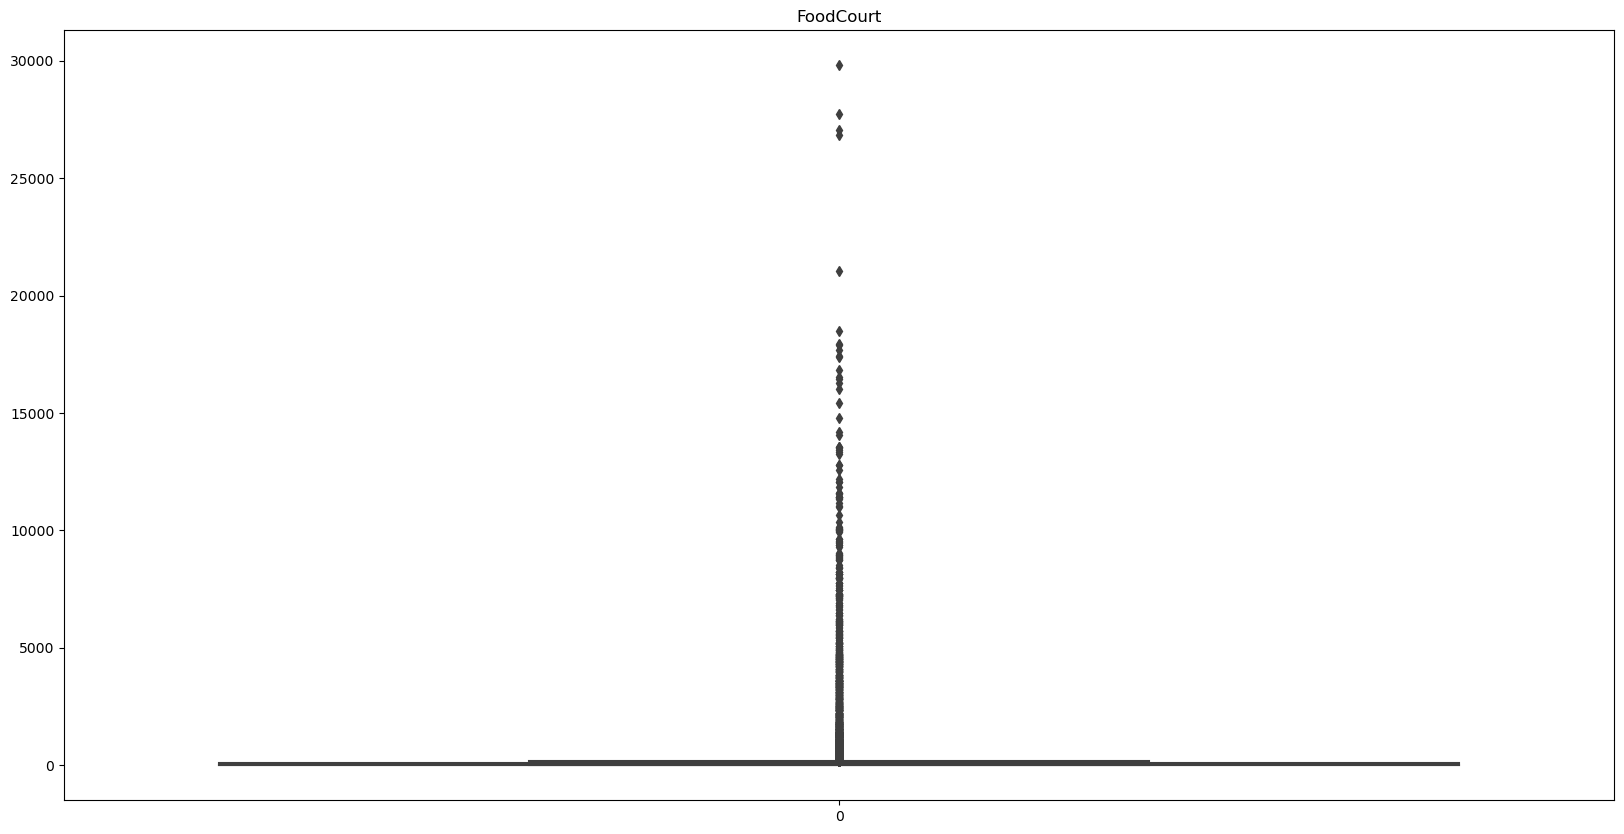

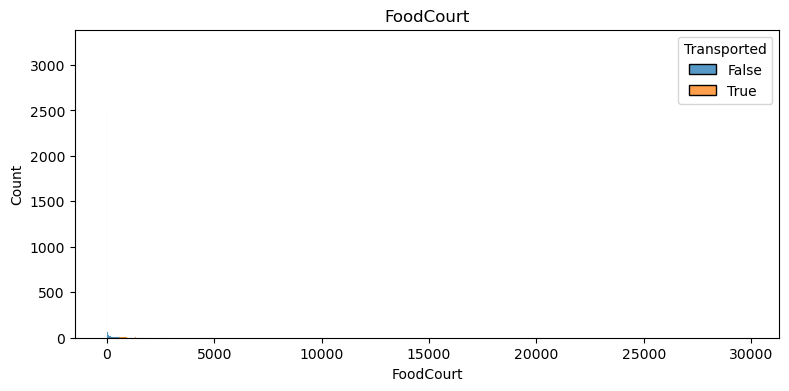

In [524]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train['FoodCourt'])
plt.title('FoodCourt')

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train['FoodCourt'],
             x=data_train['FoodCourt'],
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('FoodCourt')

#### PLOTTING BAR CHART FOR SHOPPING_MALL FEATURE IN RELATION TO TRANSPORTED FEATURE AND BOX PLOT OF SHOPPING_MALL FEATURE TO CHECK FOR OUTLIERS

Text(0.5, 1.0, 'ShoppingMall')

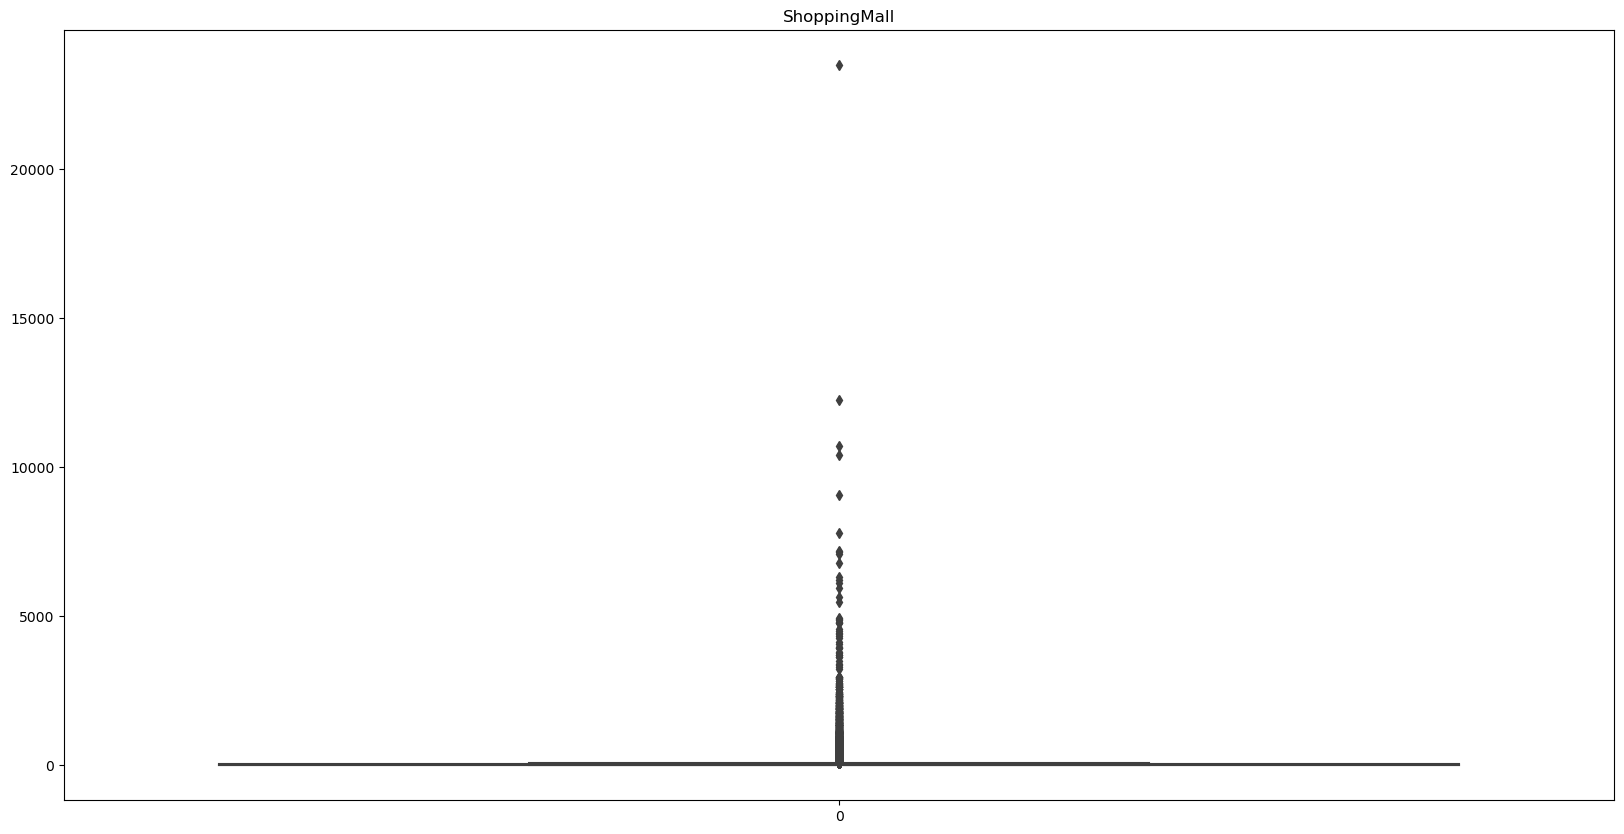

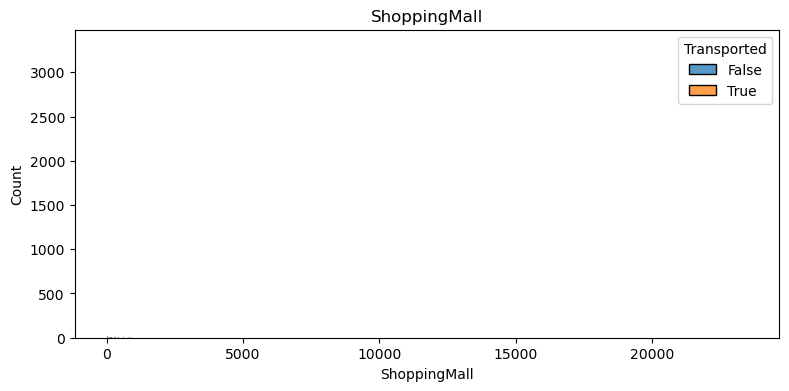

In [525]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train['ShoppingMall'])
plt.title('ShoppingMall')

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train['ShoppingMall'],
             x=data_train['ShoppingMall'],
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('ShoppingMall')

#### PLOTTING BAR CHART FOR SPA FEATURE IN RELATION TO TRANSPORTED FEATURE AND BOX PLOT OF SPA FEATURE TO CHECK FOR OUTLIERS

Text(0.5, 1.0, 'Spa')

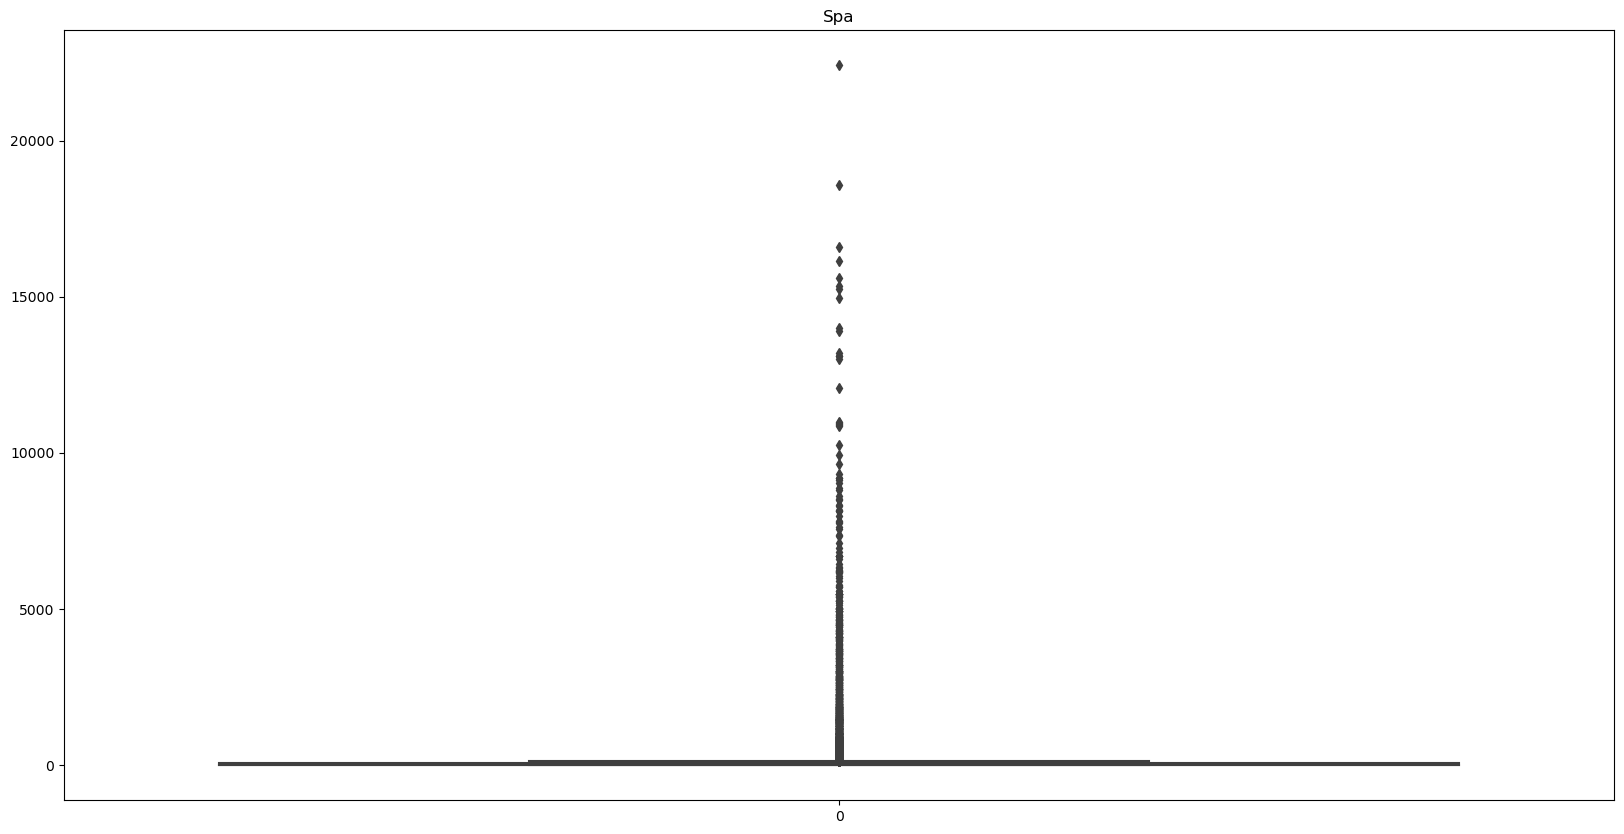

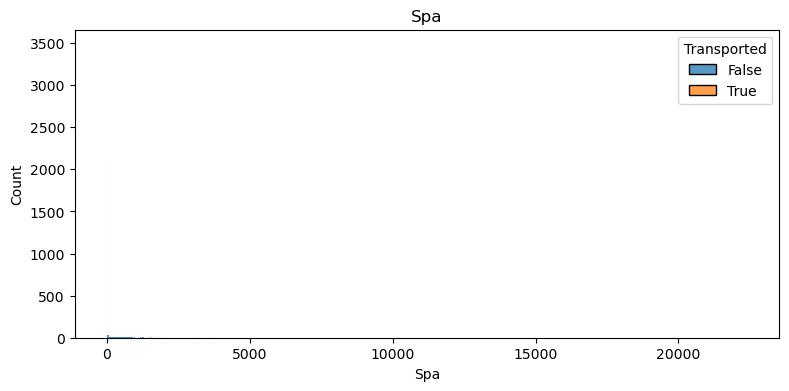

In [526]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train['Spa'])
plt.title('Spa')

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train['Spa'],
             x=data_train['Spa'],
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('Spa')

#### PLOTTING BAR CHART FOR VR_DECK FEATURE IN RELATION TO TRANSPORTED FEATURE AND BOX PLOT OF VR_DECK FEATURE TO CHECK FOR OUTLIERS

Text(0.5, 1.0, 'VRDeck')

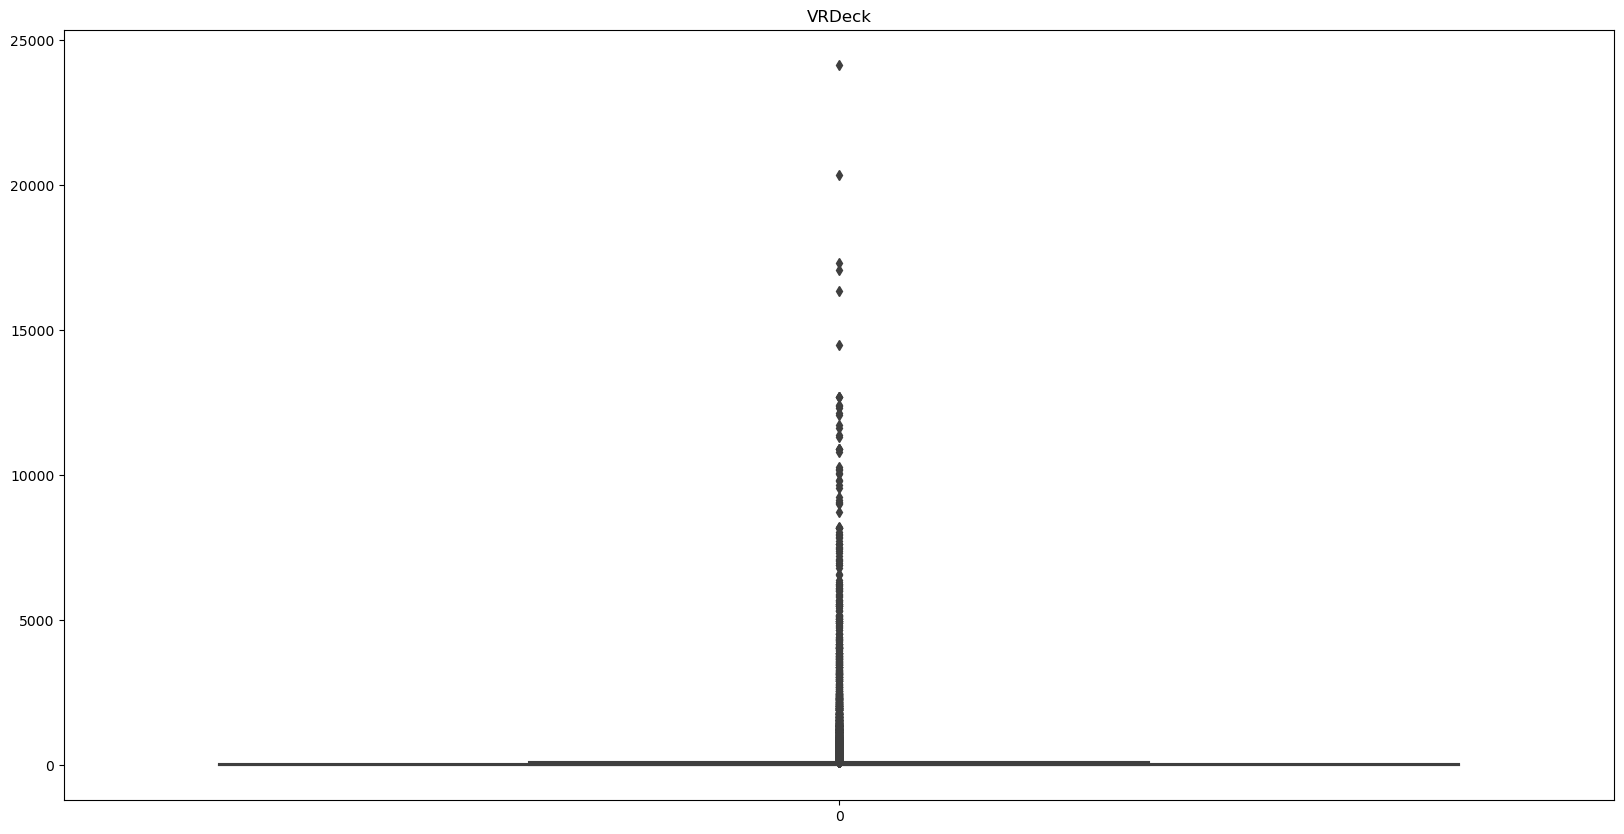

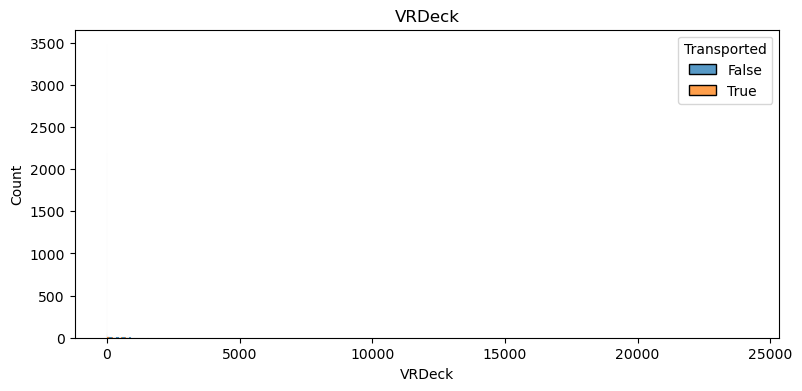

In [527]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train['VRDeck'])
plt.title('VRDeck')

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train['VRDeck'],
             x=data_train['VRDeck'],
             hue=data_train['Transported'],
             multiple='dodge')
plt.title('VRDeck')

 #### DELETING PASSENGER_ID, CABIN AND NAME FEATURES FROM DATASET

In [528]:
for data in dataset:
    del data['PassengerId']
    del data['Cabin']
    del data['Name']

 #### PRINTING DATA_TRAIN TO ENCODE CATEGORICAL FEATURES

In [529]:
data_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,GroupSize,Solo,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,True,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,1,True,A,98,P
8490,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,1,True,G,1499,S
8491,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,1,True,G,1500,S
8492,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,2,False,E,608,S


 #### SELECTING FEATURES TO LABEL ENCODE

In [530]:
data_train_label_encoder = data_train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Solo', 'CabinDeck', 'CabinSide']]

data_test_label_encoder = data_test[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Solo', 'CabinDeck', 'CabinSide']]

#### CREATING MASK TO PRESERVE NON VALUES AFTER ENCODING

In [531]:
original_train = data_train_label_encoder
original_test = data_test_label_encoder

mask_train = data_train_label_encoder.isnull()
mask_test = data_test_label_encoder.isnull()

#### CREATING DATA_TRAIN AND DATA_TEST AS STRINGS

In [532]:
data_train_str = data_train_label_encoder.astype(str)
data_test_str = data_test_label_encoder.astype(str)

#### APPLYING LABEL ENCODING ON STRING DATASET

In [533]:
data_train_mod = data_train_str.apply(LabelEncoder().fit_transform)
data_test_mod = data_test_str.apply(LabelEncoder().fit_transform)

#### APPLYING MASK TO PRESERVE NULL VALUES IN DATASET

In [534]:
data_train_mod2 = data_train_mod.where(~mask_train, original_train)
data_test_mod2 = data_test_mod.where(~mask_test, original_test)

#### PLOTTING BAR CHART FOR CRYO_SLEEP FEATURE IN RELATION TO TRANSPORTED FEATURE

#### DELETING ENCODED FEATURES

In [535]:
for data in dataset:
    del data['HomePlanet']
    del data['CryoSleep']
    del data['Destination']
    del data['VIP']
    del data['Solo']
    del data['CabinDeck']
    del data['CabinSide']

del data_train['Transported']

#### MERGING ENCODED FEATURES  WITH NON-CATEGORICAL FEATURES FROM ORIGINAL DATASET

In [536]:
data_train = pd.concat([data_train_mod2, data_train], axis=1)
data_test = pd.concat([data_test_mod2, data_test], axis=1)

dataset = [data_train, data_test]

#### PRINTING DATA_TRAIN

In [537]:
data_train.describe(include = 'all')

,HomePlanet,CryoSleep,Destination,VIP,Transported,Solo,CabinDeck,CabinSide,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupSize,CabinNum
count,8299.0,8284.0,8316.0,8297.0,8494.000000,8494.000000,8494.000000,8494.000000,8319.000000,8317.000000,8316.000000,8288.000000,8313.000000,8310.000000,8494,8494.000000,8494
unique,3.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6118,NaN,1817
top,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5133,NaN,82
freq,4507.0,5331.0,5788.0,8104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,28
mean,NaN,NaN,NaN,NaN,0.503650,0.554038,4.305392,0.504827,28.820411,221.954671,457.992665,174.700531,306.623120,306.132371,NaN,2.030728,NaN
std,NaN,NaN,NaN,NaN,0.500016,0.497101,1.778233,0.500006,14.488090,640.734593,1616.551099,608.668091,1119.076668,1148.895082,NaN,1.591178,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,3.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,5.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,1.000000,1.000000,6.000000,1.000000,38.000000,48.000000,78.250000,28.000000,59.000000,46.750000,NaN,3.000000,NaN


#### CHANGING DATA TYPE FROM ORIGINAL TO FLOAT

In [538]:
data_train_float = data_train.astype(float)
data_test_float = data_test.astype(float)

#### PRINTING DATA_TRAIN AFTER CHANGE OF DATA TYPE

In [539]:
data_train_float.describe(include = 'all')

,HomePlanet,CryoSleep,Destination,VIP,Transported,Solo,CabinDeck,CabinSide,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupSize,CabinNum
count,8299.000000,8284.000000,8316.000000,8297.000000,8494.000000,8494.000000,8494.000000,8494.000000,8319.000000,8317.000000,8316.000000,8288.000000,8313.000000,8310.000000,8494.000000,8494.000000,8494.000000
mean,0.664417,0.356470,1.485570,0.023261,0.503650,0.554038,4.305392,0.504827,28.820411,221.954671,457.992665,174.700531,306.623120,306.132371,4644.420768,2.030728,600.367671
std,0.798770,0.478985,0.818992,0.150742,0.500016,0.497101,1.778233,0.500006,14.488090,640.734593,1616.551099,608.668091,1119.076668,1148.895082,2668.389652,1.591178,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2347.000000,1.000000,167.250000
50%,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,5.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4643.500000,1.000000,427.000000
75%,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,6.000000,1.000000,38.000000,48.000000,78.250000,28.000000,59.000000,46.750000,6891.750000,3.000000,999.000000
max,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,7.000000,1.000000,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,1894.000000


#### PRINTING INFO AND NULL VALUES FOR DATASET TO APPLY KNN IMPUTER

In [540]:
for data in dataset:
    print(data.isnull().sum())
    print(data.info())

HomePlanet      195
CryoSleep       210
Destination     178
VIP             197
Transported       0
Solo              0
CabinDeck         0
CabinSide         0
Age             175
RoomService     177
FoodCourt       178
ShoppingMall    206
Spa             181
VRDeck          184
Group             0
GroupSize         0
CabinNum          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8299 non-null   object 
 1   CryoSleep     8284 non-null   object 
 2   Destination   8316 non-null   object 
 3   VIP           8297 non-null   object 
 4   Transported   8494 non-null   int64  
 5   Solo          8494 non-null   int64  
 6   CabinDeck     8494 non-null   int64  
 7   CabinSide     8494 non-null   int64  
 8   Age           8319 non-null   float64
 9   RoomService   8317 non-null   float64
 10  FoodCourt     8316 

#### APPLYING KNN IMPUTER ON DATASET

In [541]:
imputer = KNNImputer(n_neighbors=2)

data_train = pd.DataFrame(imputer.fit_transform(data_train_float), columns= data_train_float.columns)
data_test = pd.DataFrame(imputer.fit_transform(data_test_float), columns= data_test_float.columns)

dataset = [data_train, data_test]

#### CHECK FOR MISSING DATA VALUES AFTER KNN IMPUTATION

In [542]:
for data in dataset:
    print(data.isnull().sum())
    print(data.info())

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Transported     0
Solo            0
CabinDeck       0
CabinSide       0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
GroupSize       0
CabinNum        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8494 non-null   float64
 1   CryoSleep     8494 non-null   float64
 2   Destination   8494 non-null   float64
 3   VIP           8494 non-null   float64
 4   Transported   8494 non-null   float64
 5   Solo          8494 non-null   float64
 6   CabinDeck     8494 non-null   float64
 7   CabinSide     8494 non-null   float64
 8   Age           8494 non-null   float64
 9   RoomService   8494 non-null   float64
 10  FoodCourt     8494 non-null   float64
 11  ShoppingMa

#### CORRELATION PLOT OF ALL FEATURES

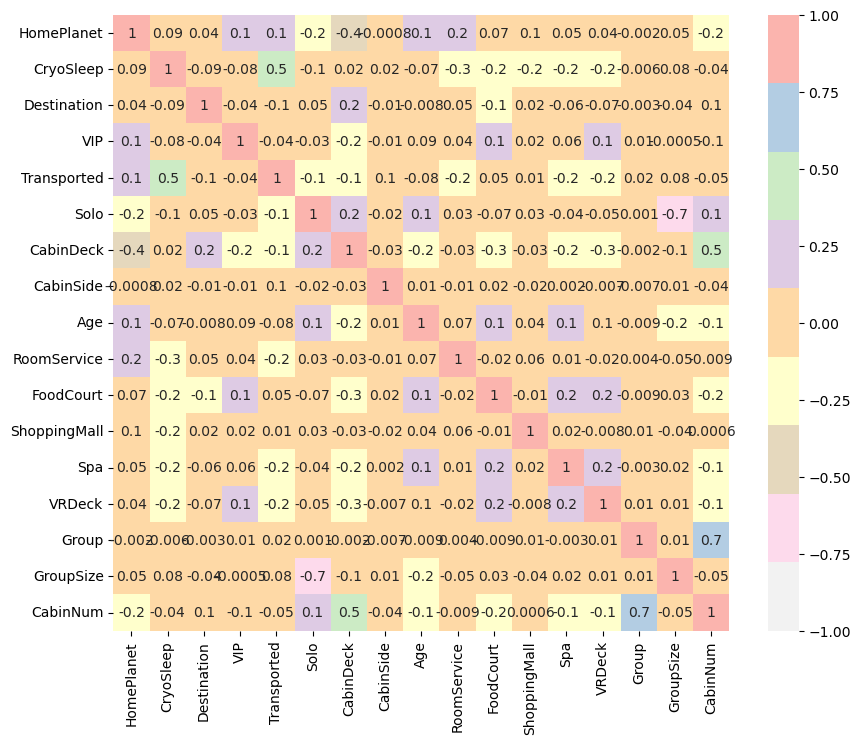

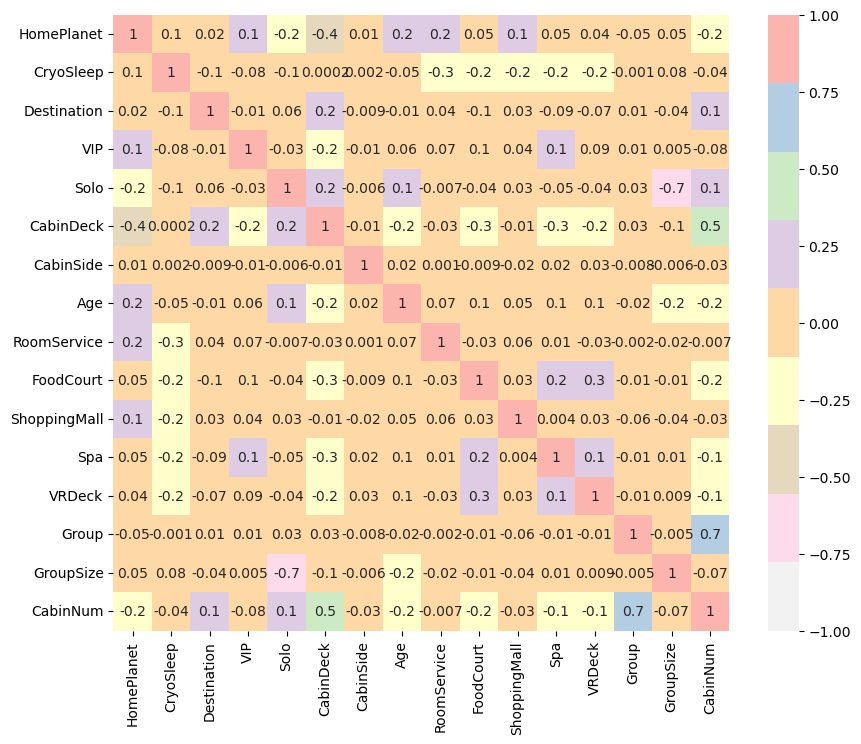

In [543]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                annot= True,
                fmt='.1g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### DEFINING CLASSIFICATION MODELS

In [544]:
models = [
    KNeighborsClassifier(),  
    LogisticRegression(max_iter=3000),  
    DecisionTreeClassifier(),  
    RandomForestClassifier(max_depth=12, 
                           min_samples_leaf=8, 
                           min_samples_split=20, 
                           n_estimators=300),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric = 'logloss', 
                  max_depth = 5, 
                  min_child_weight = 3, 
                  gamma = 3, 
                  colsample_bytree = 0.5, 
                  n_estimators=700),
    ExtraTreesClassifier(max_depth=25,
                         n_estimators=320),
    AdaBoostClassifier()
]

#### DEFINING TRAIN AND DEST DATA TO TRAIN MODELS ON

In [545]:
X_train = data_train.drop('Transported', axis= 1)
y_train = data_train['Transported']

X_test = data_test

#### DEFINING CROSS-VALIDATION TO AVOID OVER-FITTING

In [546]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### TRAINING ALL MODELS ON TRAIN DATA AND PRINTING ACCURACY SCORE FOR ALL MODELS

In [547]:
score_before_outliers_detection = []

for model in models:
    model.fit(X_train,y_train)
    score = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    score_before_outliers_detection.append(score['test_score'].mean())
    model.predict(X_test)

#### DEFINING ISOLATION FOREST MODEL TO CHECK FOR OUTLIERS

In [548]:
outlier1 = IsolationForest(contamination=0.1)
outlier2 = iso.fit_predict(X_train.to_numpy())

#### CREATING DATAFRAME WITH OUTLIERS

In [549]:
outlier = pd.DataFrame(outlier_2)

#### JOINING OUTLIERS COLUMN WITH X_TRAIN AND Y_TRAIN DATAFRAMES

In [550]:
X_train = pd.concat([X_train, outlier.rename(columns={outlier.columns[0]: 'Outlier'})], axis=1)
y_train = pd.concat([y_train, outlier.rename(columns={outlier.columns[0]: 'Outlier'})], axis=1)

#### TRANSFORMING X_TRAIN AND Y_TRAIN DATAFRAMES WITHOUT OUTLIERS

In [551]:
X_train = X_train[X_train['Outlier'] != -1]
X_train = X_train.drop(['Outlier'], axis=1)

y_train = y_train[y_train['Outlier'] != -1]
y_train = y_train.drop(['Outlier'], axis=1)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

#### TRAINING ALL MODELS ON TRAIN DATA WITHOUT OUTLIERS AND PRINTING ACCURACY SCORE FOR ALL MODELS

In [552]:
score_after_outliers_detection = []

for model in models:
    model.fit(X_train,y_train.values.ravel())
    score = cross_validate(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
    score_after_outliers_detection.append(score['test_score'].mean())
    model.predict(X_test)

In [553]:
model_name = []

for model in models:
    model_name.append(type(model).__name__)

In [555]:
overview = pd.concat([pd.DataFrame(model_name).rename(columns={outlier.columns[0]: 'Model name'}), 
                      pd.DataFrame(score_before_outliers_detection).rename(columns={outlier.columns[0]: 'Score before outlier detection'}), 
                      pd.DataFrame(score_after_outliers_detection).rename(columns={outlier.columns[0]: 'Score after outlier detection'})], 
                      axis=1)

overview

,Model name,Score before outlier detection,Score after outlier detection
0,KNeighborsClassifier,0.706738,0.725147
1,LogisticRegression,0.777960,0.771060
2,DecisionTreeClassifier,0.711325,0.711397
3,RandomForestClassifier,0.800212,0.793041
4,GradientBoostingClassifier,0.789851,0.789770
5,XGBClassifier,0.795386,0.790555
6,ExtraTreesClassifier,0.793383,0.784928
7,AdaBoostClassifier,0.792678,0.777604
